## Unit 6 | Assignment - What's the Weather Like?
* There is a clear connection between Temperature and Latitude
* There is no connection between cloud cover and the latitude
* There is no connection between wind speed and the latitude


In [1]:
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

from citipy import citipy

#import api_key
from config import api_key

In [2]:
# make the API call using owm's get_fourcast_hourly method
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
temp = []
lat = []
hum = []
cloud = []
wind = []

cities = set()
#rand_numbers_lol = {}

number_of_cities = 501
#rand_lat = {}
#rand_lon = {}
count = 0
#random.uniform(-90,90), random.uniform(-180,180)

In [3]:
query_url = f"{url}appid={api_key}&units={units}&q="
while (len(set(cities)) < number_of_cities):
    city = citipy.nearest_city(random.uniform(-90,90), random.uniform(-180,180))
    response = requests.get(query_url + city.city_name).json()
    if response['cod'] == '404':
        #print('Not Found')
        continue
    else:
        prev_number_of_cities = len(cities)
        cities.add(city.city_name)
        if prev_number_of_cities != len(cities):
            temp.append(response['main']['temp'])
            lat.append(response['coord']['lat'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            print(f'-----------------------------\nProcessing Record {len(set(cities))} of Set {number_of_cities} | {city.city_name} {query_url + city.city_name}'
            )


-----------------------------
Processing Record 1 of Set 501 | busselton http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=busselton
-----------------------------
Processing Record 2 of Set 501 | sechura http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=sechura
-----------------------------
Processing Record 3 of Set 501 | cape town http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=cape town
-----------------------------
Processing Record 4 of Set 501 | ushuaia http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=ushuaia
-----------------------------
Processing Record 5 of Set 501 | harper http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=harper
-----------------------------
Processing Record 6 of Set 501 | arraial do cabo http:

-----------------------------
Processing Record 46 of Set 501 | cidreira http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=cidreira
-----------------------------
Processing Record 47 of Set 501 | kalmunai http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=kalmunai
-----------------------------
Processing Record 48 of Set 501 | isangel http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=isangel
-----------------------------
Processing Record 49 of Set 501 | along http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=along
-----------------------------
Processing Record 50 of Set 501 | hami http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=hami
-----------------------------
Processing Record 51 of Set 501 | nikolskoye http://api.openw

-----------------------------
Processing Record 91 of Set 501 | fez http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=fez
-----------------------------
Processing Record 92 of Set 501 | harbour breton http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=harbour breton
-----------------------------
Processing Record 93 of Set 501 | iturama http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=iturama
-----------------------------
Processing Record 94 of Set 501 | vila franca do campo http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=vila franca do campo
-----------------------------
Processing Record 95 of Set 501 | jamestown http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=jamestown
-----------------------------
Processing Record 9

-----------------------------
Processing Record 135 of Set 501 | estelle http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=estelle
-----------------------------
Processing Record 136 of Set 501 | algiers http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=algiers
-----------------------------
Processing Record 137 of Set 501 | kahului http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=kahului
-----------------------------
Processing Record 138 of Set 501 | esperance http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=esperance
-----------------------------
Processing Record 139 of Set 501 | mayo http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=mayo
-----------------------------
Processing Record 140 of Set 501 | havelock http://a

-----------------------------
Processing Record 179 of Set 501 | fushan http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=fushan
-----------------------------
Processing Record 180 of Set 501 | ixtapa http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=ixtapa
-----------------------------
Processing Record 181 of Set 501 | benguela http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=benguela
-----------------------------
Processing Record 182 of Set 501 | thinadhoo http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=thinadhoo
-----------------------------
Processing Record 183 of Set 501 | dinguiraye http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=dinguiraye
-----------------------------
Processing Record 184 of Set 501 | ribeira

-----------------------------
Processing Record 223 of Set 501 | langsa http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=langsa
-----------------------------
Processing Record 224 of Set 501 | vila http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=vila
-----------------------------
Processing Record 225 of Set 501 | mulchen http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=mulchen
-----------------------------
Processing Record 226 of Set 501 | coquimbo http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=coquimbo
-----------------------------
Processing Record 227 of Set 501 | sola http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=sola
-----------------------------
Processing Record 228 of Set 501 | fort-shevchenko http://api.

-----------------------------
Processing Record 268 of Set 501 | yulara http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=yulara
-----------------------------
Processing Record 269 of Set 501 | nouakchott http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=nouakchott
-----------------------------
Processing Record 270 of Set 501 | tuktoyaktuk http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=tuktoyaktuk
-----------------------------
Processing Record 271 of Set 501 | bay roberts http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=bay roberts
-----------------------------
Processing Record 272 of Set 501 | puerto madryn http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=puerto madryn
-----------------------------
Processing Record 

-----------------------------
Processing Record 312 of Set 501 | mastic beach http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=mastic beach
-----------------------------
Processing Record 313 of Set 501 | esil http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=esil
-----------------------------
Processing Record 314 of Set 501 | revelstoke http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=revelstoke
-----------------------------
Processing Record 315 of Set 501 | hamilton http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=hamilton
-----------------------------
Processing Record 316 of Set 501 | lompoc http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=lompoc
-----------------------------
Processing Record 317 of Set 501 | togur

-----------------------------
Processing Record 356 of Set 501 | kikwit http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=kikwit
-----------------------------
Processing Record 357 of Set 501 | finschhafen http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=finschhafen
-----------------------------
Processing Record 358 of Set 501 | airai http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=airai
-----------------------------
Processing Record 359 of Set 501 | leninskoye http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=leninskoye
-----------------------------
Processing Record 360 of Set 501 | matucana http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=matucana
-----------------------------
Processing Record 361 of Set 501 | matar

-----------------------------
Processing Record 401 of Set 501 | rabak http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=rabak
-----------------------------
Processing Record 402 of Set 501 | polunochnoye http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=polunochnoye
-----------------------------
Processing Record 403 of Set 501 | vila velha http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=vila velha
-----------------------------
Processing Record 404 of Set 501 | clyde http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=clyde
-----------------------------
Processing Record 405 of Set 501 | luderitz http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=luderitz
-----------------------------
Processing Record 406 of Set 501 | santa

-----------------------------
Processing Record 446 of Set 501 | santa maria http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=santa maria
-----------------------------
Processing Record 447 of Set 501 | linqiong http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=linqiong
-----------------------------
Processing Record 448 of Set 501 | bandarbeyla http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=bandarbeyla
-----------------------------
Processing Record 449 of Set 501 | manaus http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=manaus
-----------------------------
Processing Record 450 of Set 501 | port moresby http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=port moresby
-----------------------------
Processing Record 451 of

-----------------------------
Processing Record 490 of Set 501 | manakara http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=manakara
-----------------------------
Processing Record 491 of Set 501 | hambantota http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=hambantota
-----------------------------
Processing Record 492 of Set 501 | roebourne http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=roebourne
-----------------------------
Processing Record 493 of Set 501 | port macquarie http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=port macquarie
-----------------------------
Processing Record 494 of Set 501 | wakkanai http://api.openweathermap.org/data/2.5/weather?appid=ff31044259f1be250728e2f69466884d&units=imperial&q=wakkanai
-----------------------------
Processing Record 495 

In [4]:
#print(json.dumps(response, indent=4, sort_keys=True))

#len(wind)

len(list(cities))

len(temp)

len(lat)

501

In [10]:
# Build partial query URL

#response = requests.get(query_url + city.city_name).json()
#temp.append(response['main']['temp'])
#lat.append(response['coord']['lat'])
weather_dict = {
    "city": list(cities),
    "temp": temp,
    "lat": lat,
    "hum":hum,
    "cloud":cloud,
    "wind":wind    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("weather.csv", encoding="utf-8", index=False)
weather_data.head()

,city,cloud,hum,lat,temp,wind
0,vetrni,80,95,-33.64,69.71,21.63
1,tasiilaq,0,79,-5.56,68.99,8.25
2,kawalu,0,93,-33.93,50.00,5.82
3,zhangye,40,65,-54.81,41.00,17.22
4,melfi,90,93,30.30,58.64,8.05


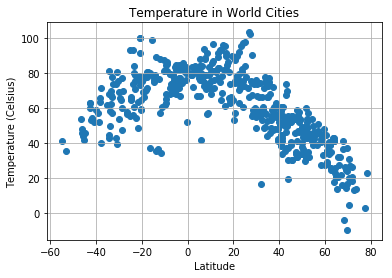

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

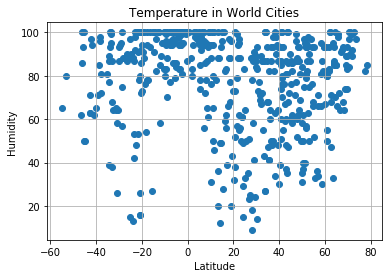

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["hum"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

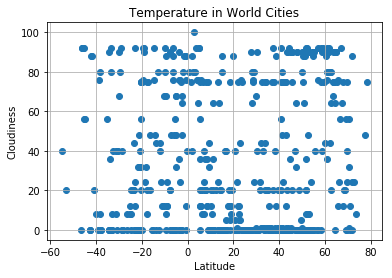

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloud"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

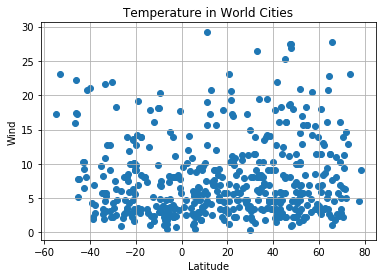

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()